In [1]:
import joblib
import numpy as np
import os

import jax.numpy as jnp
import jax

import mujoco
from mujoco import mjx
from pathlib import Path
from hydrax.algs import CEM, MPPI, PredictiveSampling, Evosax
from hydrax.tasks.cart_pole import CartPole
from tasks.cart_pole_unconstrained import CartPoleUnconstrained
from tasks.pusht_unconstrained import PushTUnconstrained
from tasks.pendulum_unconstrained import PendulumUnconstrained
from tasks.double_cart_pole_unconstrained import DoubleCartPoleUnconstrained

from hydrax.tasks.cube import CubeRotation
from hydrax.tasks.pusht import PushT
from hydrax.tasks.humanoid_standup import HumanoidStandup
from hydrax.tasks.humanoid_mocap import HumanoidMocap
from hydrax.tasks.walker import Walker
from traj_opt_helper import traj_opt_helper
from algorithm import create_algorithm
from task import create_task

# # Prevent JAX from pre-allocating all GPU memory
# os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
# os.environ['XLA_PYTHON_CLIENT_ALLOCATOR'] = 'platform'
# os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '0.7'

# os.environ['XLA_FLAGS'] = (
#     '--xla_gpu_deterministic_ops=true '
#     '--xla_gpu_autotune_level=0' 
# )

# jax.config.update("jax_platform_name", "cpu")  

print(jax.devices()) 

/home/rooh/miniconda3/envs/hydrax/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[CudaDevice(id=0)]


## Trajectory Optimization Benchmarks

This notebook helps you run trajectory-optimization benchmarks on a robotics problem and visualize the solution.


**Supported sampling-based algorithms:**
- MPPI  
- MPPI-CMA  
- Predictive Sampling  
- CMA-ES  
- Randomized Smoothing  

**Supported tasks:**

*Easy tasks*:
- Cartpole  
- Inverted Pendulum  
- Double Cartpole

*Hard tasks (contact-rich)*:
- PushT  
- Humanoid  
- Cube Rotation  


# Define you algorithm, task, and parameters

In [ ]:

algorithms = ["MPPI-CMA", "MPPI", "PredictiveSampling"] # MPPI, MPPI-CMA, RandomizedSmoothing, PredictiveSampling, CMA-ES
task_name = "CartPole" # "CartPole", "InvertedPendulum", "DoubleCartPole", "PushT", "CubeRotation", "Humanoid"
# Parameters
num_trails = 6
max_iterations = 1000
num_samples = 2048
sigma_init = 0.3
temperature = 0.1
spline = "zero"
horizon = 2.0
num_knots = 200 # set this to (horizon/mj_model.opt.timestep) equals to no spline interpolation

# Load task 

In [3]:
task, mj_model, mj_data = create_task(task_name=task_name)
# Python
if task.model.opt.disableflags & mujoco.mjtDisableBit.mjDSBL_WARMSTART:
    print("Warmstart is DISABLED")
else:
    print("Warmstart is ENABLED")

Warmstart is DISABLED


# (Optionally) time the algorithms

In [4]:
# from traj_opt_helper import time_profile

# algorithm_names = ["MPPI", "MPPI_CMA"]
# task_names = ["Cartpole", "PushT", "DoubleCartpole", "Humanoid"]

# alg_list = []

# for algorithm_name in algorithm_names:

#     for task_name in task_names:

#         task = create_task(task_name)
        
#         alg = create_algorithm(name = algorithm_name, 
#                         task = task,
#                         num_samples = num_samples,
#                         horizon = horizon,
#                         num_knots = num_knots,
#                         spline = spline,
#                         temperature = temperature,
#                         noise = sigma_init)
        
#         alg_list.append(alg)
    
# time_profile(alg_list, mj_model, mj_data)

# Run benchmarks
* The control trajectory of the best solution will be plotted

Trajectory Optimization with 100 steps over a 1.0 second horizon.
task.dt:0.01; controller.dt:0.01; task.model.opt.timestep: 0.01; task.mj_model.opt.timestep: 0.01; simulator mj_model.opt.timestep: 0.01
Controller dt: 0.01
Simulator dt: 0.01
Jitting the controller...
Time to jit: 14.165 seconds
path created: /home/rooh/workspace/rs-rl/traj_opt/data/CartPoleUnconstrained


100%|██████████| 1000/1000 [00:19<00:00, 51.90it/s]


Optimization done.


100%|██████████| 1000/1000 [00:18<00:00, 54.60it/s]


Optimization done.


100%|██████████| 1000/1000 [00:18<00:00, 53.66it/s]


Optimization done.


100%|██████████| 1000/1000 [00:18<00:00, 52.84it/s]


Optimization done.


100%|██████████| 1000/1000 [00:18<00:00, 53.93it/s]


Optimization done.


100%|██████████| 1000/1000 [00:18<00:00, 53.99it/s]


Optimization done.


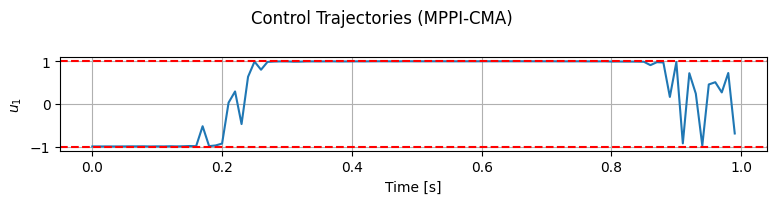

Results saved
Trajectory Optimization with 100 steps over a 1.0 second horizon.
task.dt:0.01; controller.dt:0.01; task.model.opt.timestep: 0.01; task.mj_model.opt.timestep: 0.01; simulator mj_model.opt.timestep: 0.01
Controller dt: 0.01
Simulator dt: 0.01
Jitting the controller...
Time to jit: 5.296 seconds
path created: /home/rooh/workspace/rs-rl/traj_opt/data/CartPoleUnconstrained


100%|██████████| 1000/1000 [00:17<00:00, 57.21it/s]


Optimization done.


100%|██████████| 1000/1000 [00:17<00:00, 57.65it/s]


Optimization done.


100%|██████████| 1000/1000 [00:17<00:00, 56.26it/s]


Optimization done.


100%|██████████| 1000/1000 [00:17<00:00, 56.62it/s]


Optimization done.


100%|██████████| 1000/1000 [00:17<00:00, 57.27it/s]


Optimization done.


100%|██████████| 1000/1000 [00:17<00:00, 56.40it/s]


Optimization done.


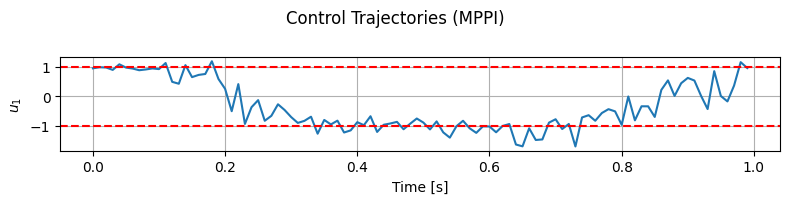

Results saved
Trajectory Optimization with 100 steps over a 1.0 second horizon.
task.dt:0.01; controller.dt:0.01; task.model.opt.timestep: 0.01; task.mj_model.opt.timestep: 0.01; simulator mj_model.opt.timestep: 0.01
Controller dt: 0.01
Simulator dt: 0.01
Jitting the controller...
Time to jit: 5.918 seconds
path created: /home/rooh/workspace/rs-rl/traj_opt/data/CartPoleUnconstrained


100%|██████████| 1000/1000 [00:17<00:00, 56.41it/s]


Optimization done.


100%|██████████| 1000/1000 [00:17<00:00, 58.79it/s]


Optimization done.


100%|██████████| 1000/1000 [00:17<00:00, 57.15it/s]


Optimization done.


100%|██████████| 1000/1000 [00:17<00:00, 56.77it/s]


Optimization done.


100%|██████████| 1000/1000 [00:17<00:00, 56.57it/s]


Optimization done.


100%|██████████| 1000/1000 [00:17<00:00, 56.56it/s]


Optimization done.


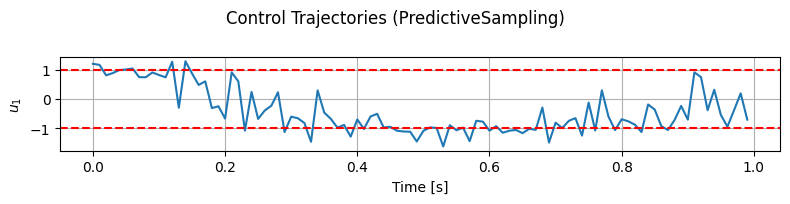

Results saved


In [5]:
for algorithm in algorithms:

    alg = create_algorithm(name = algorithm, 
                        task = task,
                        num_samples = num_samples,
                        horizon = horizon,
                        num_knots = num_knots,
                        spline = spline,
                        temperature = temperature,
                        noise = sigma_init)

    to = traj_opt_helper(algorithm, alg, mj_model, mj_data)
    to.trails(max_iteration=max_iterations, num_trails = num_trails)

# Generate convergence plot

┌──────────────────────────────────────────────┐
│        Visualising results…                  │
└──────────────────────────────────────────────┘
Results directory: /home/rooh/workspace/rs-rl/traj_opt/data/CartPoleUnconstrained


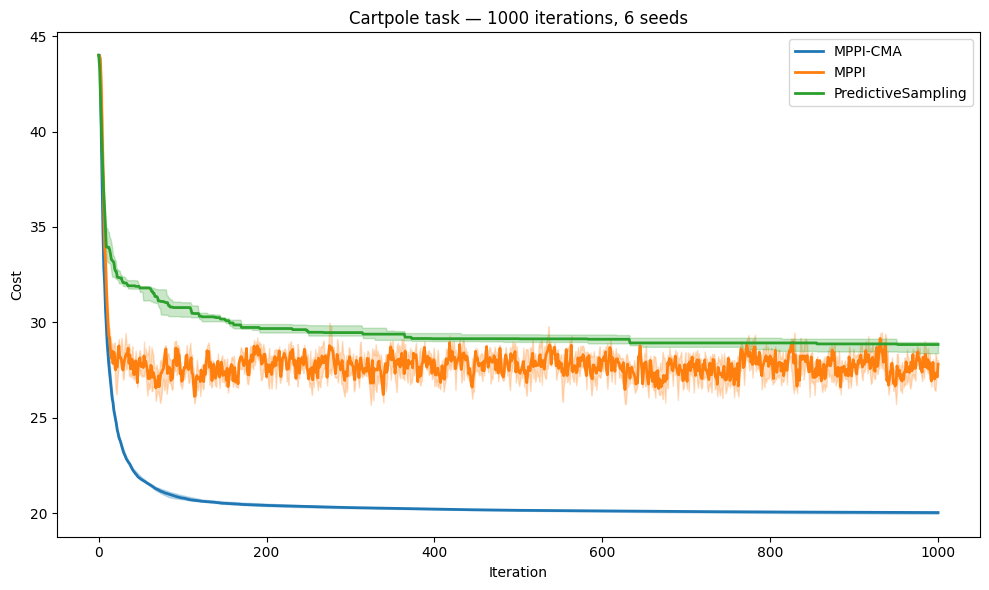

In [6]:
import matplotlib.pyplot as plt

print("┌──────────────────────────────────────────────┐")
print("│        Visualising results…                  │")
print("└──────────────────────────────────────────────┘")

results_dir = Path(traj_opt_helper.get_path(task))
print(f"Results directory: {results_dir}")

methods = {}                                   # keep raw algorithm names

for alg in algorithms:
    f = results_dir / f"{alg}_costs_trails_average.pkl"
    try:
        arr = joblib.load(f)                   # shape (n_trials, n_iters)
        methods[alg] = np.asarray(arr)
    except FileNotFoundError:
        print(f"[warn] {f.name} not found; skipping.")

if not methods:
    raise RuntimeError("No cost files loaded — nothing to plot.")

iters  = np.arange(next(iter(methods.values())).shape[1])
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

plt.figure(figsize=(10, 6))
for (name, costs), color in zip(methods.items(), colors):
    q25, med, q75 = np.quantile(costs, [0.25, 0.5, 0.75], axis=0)
    plt.plot(iters, med, lw=2, label=name, color=color)
    plt.fill_between(iters, q25, q75, color=color, alpha=0.25)

plt.title(f"{task_name.capitalize()} task — {costs.shape[1]-1} iterations, {num_trails} seeds")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.tight_layout()
plt.show()

# Visualize solution
-In simulator or as a gif

In [7]:
# try:
#     to.visualize_rollout(task, controller_name="MPPI-CMA")
# except NameError:
#     pass


GIF saved to: /home/rooh/workspace/rs-rl/traj_opt/data/CartPoleUnconstrained/PredictiveSampling.gif


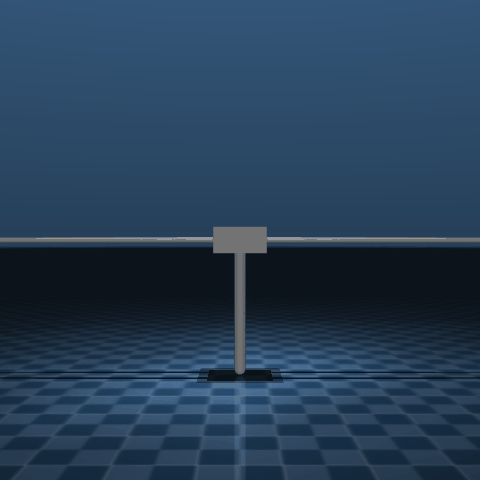

In [8]:
to.visualize_rollout_gif(task, "PredictiveSampling", fps=30)
